# Simple Data Analysis and Logistic Regression Classification 

## The Pima Indian diabetes

We want to predict whether a vector of text features corresponds to a patient having diabetes

### Attribute Information:

Patterns have 8 numeric features plus a 0-1 class label.

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 


More details and actual data available in https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import os, sys
import sklearn as skl
import seaborn as sns

np.set_printoptions(precision=3)

## Loading Data

In [3]:
f_name = 'D:\googledrive\cursos\datasets\pima.csv'
df_pima = pd.read_csv(f_name, sep=';')

print( "num_rows: %d\tnum_columns: %d\n" % (df_pima.shape[0], df_pima.shape[1]) )
print( "Column names:\n", list(df_pima.columns) )

vars_pima   = list(df_pima.columns[ : -1])
target_pima = df_pima.columns[-1]

num_rows: 768	num_columns: 9

Column names:
 ['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age', 'label']


## Data Exploration, Visualization and Correlations

Descriptive statistics, boxplots and histograms

In [4]:
########## basic feature stats

df_pima.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Removing patients with 0 blood pressure.

In [5]:
idx_blood_press_ok = df_pima['bloodPress'].values > 0.
df_pima = df_pima.loc[ idx_blood_press_ok ]

In [6]:
df_pima.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,3.855389,121.042292,72.405184,21.444748,83.609823,32.292769,0.475861,33.361528,0.343793
std,3.358106,32.179943,12.382158,15.705756,116.606997,7.271540,0.334179,11.837077,0.475297
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,45.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


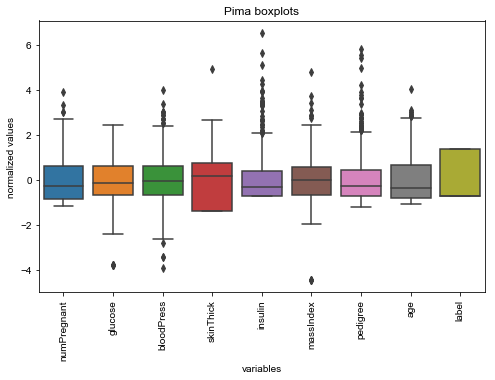

In [7]:
########## feature boxplots 

df_pima_normalizado = (df_pima - df_pima.mean()) / df_pima.std() #normalizar para tener rangos uniformes en histogramas

plt.figure( figsize=(8, 5))
plt.title("Pima boxplots")
sns.set_style("white")
bx_plot = sns.boxplot(data=df_pima_normalizado)
#bx_plot = sns.boxplot(data=df_housing)
plt.xticks(rotation=90)
plt.xlabel("variables")
plt.ylabel("normalized values")
plt.show()

### Histograms and scatterplots

Plot histograms of groups of 5 variables plus target.

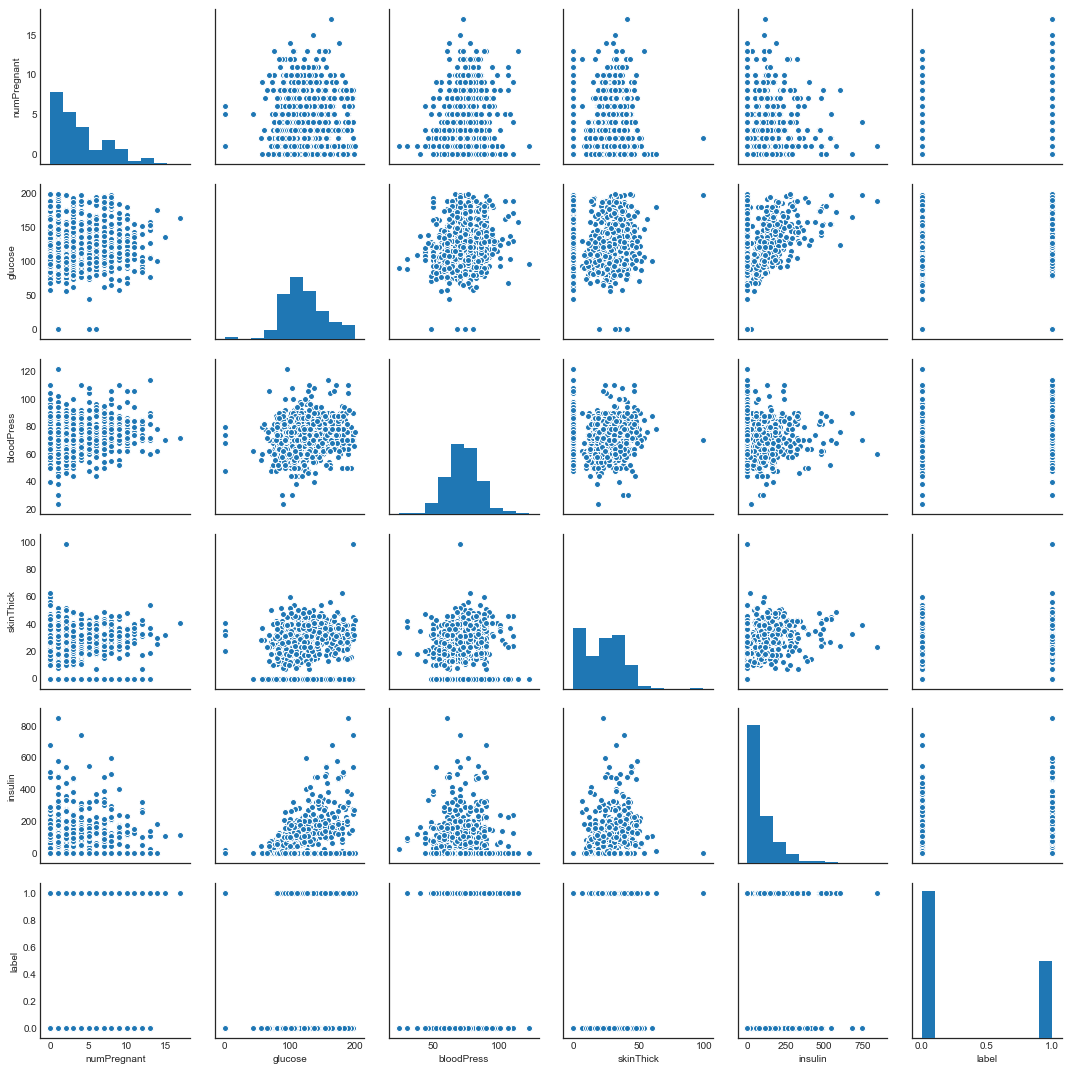

In [8]:
########## feature histograms over the entire sample

pair_plot = sns.pairplot( df_pima[ vars_pima[ : 5] + [target_pima] ] )
plt.show()

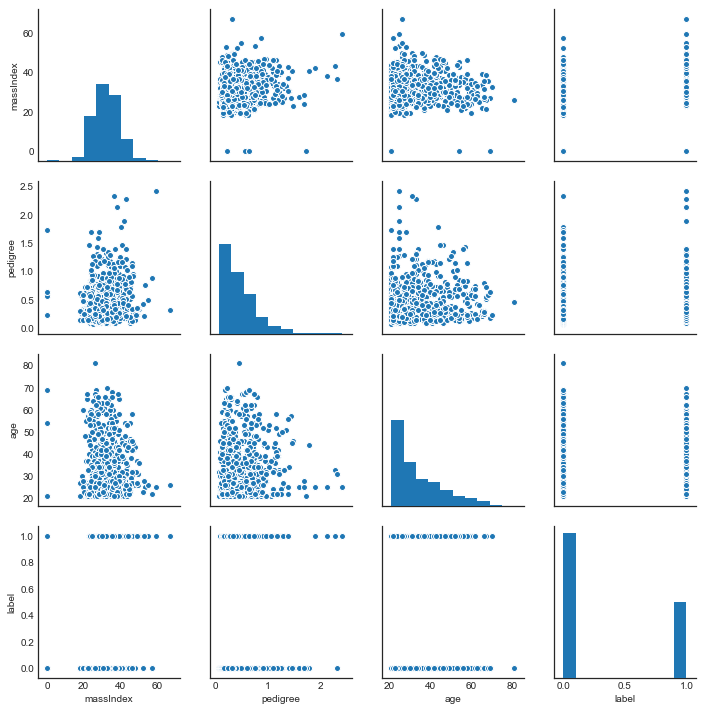

In [9]:
pair_plot = sns.pairplot( df_pima[ vars_pima[ 5 :  10] + [target_pima] ] )
plt.show()

### Positive vs Negative Histograms

In [10]:
# With pandas we can plot separately the histograms of each class

#_ = df_pima.groupby('label').hist(figsize=(9, 9))

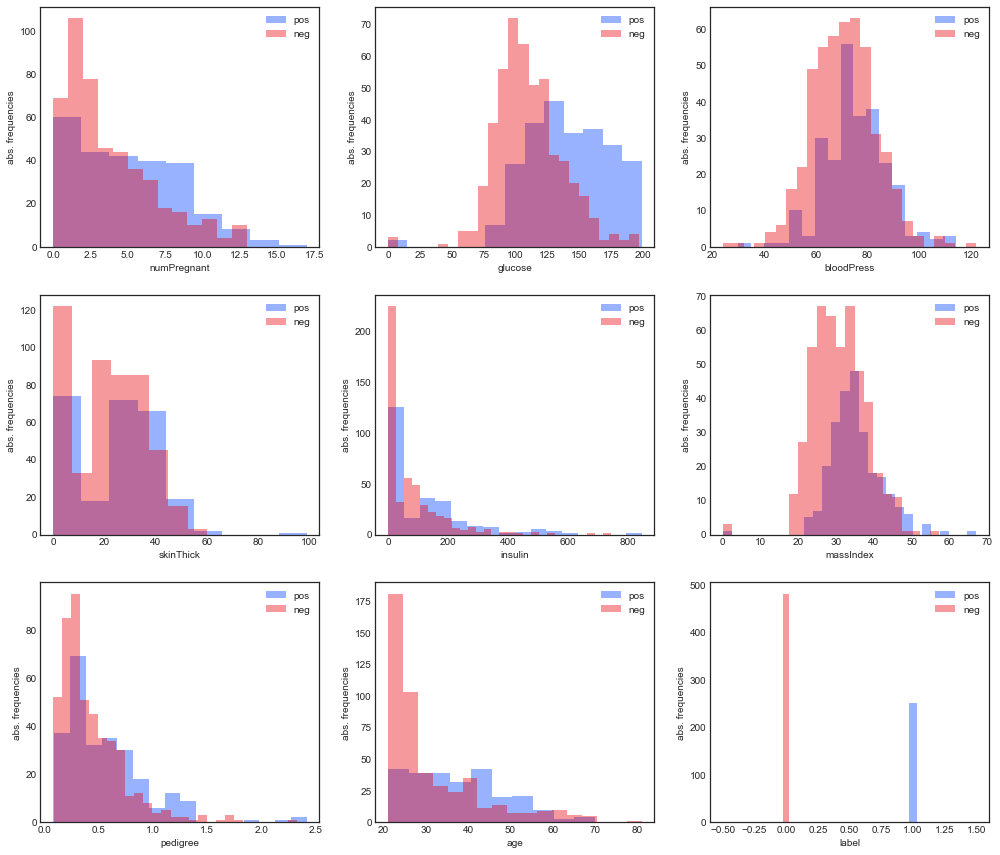

In [11]:
# But it's better to have the positive and negative histograms together

#sns.set(color_codes=True)
sns.set_color_codes("bright")
sns.set_style("white")

num_columns = 3
num_rows = int( np.ceil( len(df_pima.columns)/num_columns ) )
bins = None

plt.figure( figsize=(17, 5*num_rows))
plt.title("Pima positive vs negative histograms")

for i, var in enumerate (df_pima.columns):
    pos = np.where( df_pima[target_pima] == 1)[0]
    neg = np.where( df_pima[target_pima] == 0)[0]

    plt.subplot(num_rows, num_columns, i+1)
    
    #plt.hist( df_pima[ var ].iloc[pos], bins=bins, color='b', label='pos', alpha=0.5)
    #plt.hist( df_pima[ var ].iloc[neg], bins=bins, color='r', label='neg', alpha=0.5)

    sns.distplot( df_pima[ var ].iloc[pos], bins=bins, kde=False, color='b', label='pos')
    sns.distplot( df_pima[ var ].iloc[neg], bins=bins, kde=False, color='r', label='neg')
    
    plt.ylabel("abs. frequencies")
    plt.legend(loc='best')

plt.show()

Notice that some variables have 0 values that look anomalous. Perhaps we should remove these patterns?

## Correlations

In [12]:
df_pima.corr().round(decimals=3)

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
numPregnant,1.000,0.137,0.214,-0.097,-0.079,0.019,-0.030,0.559,0.231
glucose,0.137,1.000,0.221,0.056,0.338,0.199,0.135,0.261,0.458
bloodPress,0.214,0.221,1.000,0.006,-0.047,0.259,-0.003,0.330,0.171
skinThick,-0.097,0.056,0.006,1.000,0.418,0.395,0.175,-0.135,0.093
insulin,-0.079,0.338,-0.047,0.418,1.000,0.193,0.181,-0.051,0.143
massIndex,0.019,0.199,0.259,0.395,0.193,1.000,0.123,0.007,0.291
pedigree,-0.030,0.135,-0.003,0.175,0.181,0.123,1.000,0.020,0.178
age,0.559,0.261,0.330,-0.135,-0.051,0.007,0.020,1.000,0.248
label,0.231,0.458,0.171,0.093,0.143,0.291,0.178,0.248,1.000


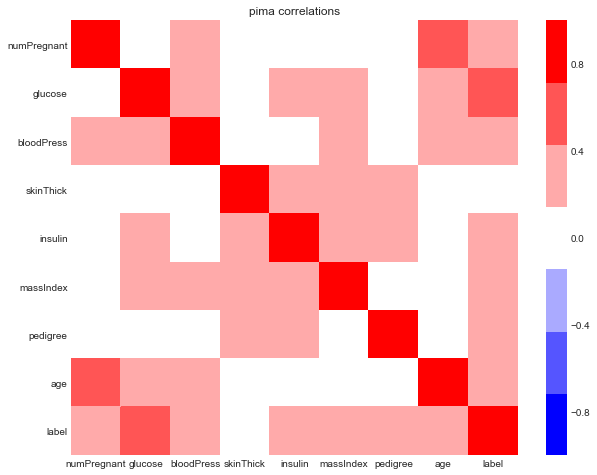

In [13]:
# correlation heatmap
cMap = plt.cm.get_cmap("bwr",lut=7) 

plt.figure( figsize=(10, 8))
plt.title('pima correlations')
_ = sns.heatmap(df_pima.corr().values, vmin=-1., vmax=1., cmap=cMap, 
                xticklabels=list(df_pima.columns),
                yticklabels=list(df_pima.columns))

### Most correlated features

In [14]:
########## rank features according to correlation with targets

print( ( df_pima.corr()['label'].abs().sort_values(ascending=False).T) )

label          1.000000
glucose        0.458410
massIndex      0.290653
age            0.248376
numPregnant    0.230619
pedigree       0.178271
bloodPress     0.170589
insulin        0.143465
skinThick      0.092587
Name: label, dtype: float64


## Logistic Regression

Just getting started ...

We first run a single model over all data and then explore CV.

In all cases we use l2 penalty, the newton-cg solver and a penalty C=1.

**Important**: C penalizes the cost function and not the l2 penalty

### Building a first logistic regression model

b: -0.885621


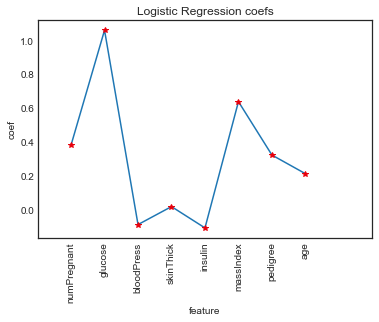

In [15]:
########## build a first log regression model

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

x = df_pima[ vars_pima ].values
y = df_pima[ target_pima ].values

# scale data
std_sc = StandardScaler()
x = std_sc.fit_transform(x)

# the default regularization value is C=1.
logr_m =  LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)

# fit sobre la muestra completa, sin split train-test
logr_m.fit(x, y)

print("b: %f" % logr_m.intercept_)

nticks_coefs = len(df_pima.columns)-1
plt.title('Logistic Regression coefs')
plt.xlabel('feature')
plt.ylabel('coef')
plt.xlim(-1, nticks_coefs+1)
#plt.ylim(-1., 1.)
plt.xticks(range(nticks_coefs), vars_pima, rotation='vertical')
_ = plt.plot(logr_m.coef_.reshape( x.shape[1] ), '-', logr_m.coef_.reshape( x.shape[1] ), 'r*')

### Accuracy, recall and precision

In [16]:
########## accuracy, precision, recall of the classifier obtained

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

y_pred = logr_m.predict(x)

acc    = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
prec   = precision_score(y, y_pred) 

print("acc: %.3f\trecall: %.3f\tprecision: %.3f" % (acc, recall, prec))

print("\nconfusion matrix:\n", confusion_matrix(y, y_pred))

acc: 0.776	recall: 0.556	precision: 0.729

confusion matrix:
 [[429  52]
 [112 140]]


### CV estimates of accuracy, recall and precision

In [17]:
########## cv values of accuracy, precision, recall
from sklearn.model_selection import cross_val_score, StratifiedKFold

logr_m =  LogisticRegression()
n_folds = 10

# accuracies
acc_cv_scores = cross_val_score(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True), scoring='accuracy')
print ("acc_cv_scores:\n\t", acc_cv_scores)
print("\n\tcv acc mean: %.3f\n" % (acc_cv_scores.mean()))

# recall
recall_cv_scores = cross_val_score(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True), scoring='recall')
print ("recall_cv_scores:\n\t", recall_cv_scores)
print("\n\tcv recall mean: %.3f\n" % (recall_cv_scores.mean()))

# precision
prec_cv_scores = cross_val_score(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True), scoring='precision')
print ("precision_cv_scores:\n\t", prec_cv_scores)
print("\n\tcv precisison mean: %.3f\n" % (prec_cv_scores.mean()))

acc_cv_scores:
	 [0.733 0.784 0.753 0.712 0.726 0.781 0.836 0.822 0.808 0.753]

	cv acc mean: 0.771

recall_cv_scores:
	 [0.5   0.615 0.36  0.68  0.64  0.68  0.44  0.76  0.56  0.36 ]

	cv recall mean: 0.560

precision_cv_scores:
	 [0.789 0.778 0.609 0.75  0.812 0.7   0.64  0.739 0.737 0.609]

	cv precisison mean: 0.716



## Tuning `C` in Logistic Regression

We select the log regression regularization parameter `C` by CV using sklearn randomized search

**Note**: `C` penalizes $\|w\|^2$ as `1./alpha/num_patterns`

We estimate the optimal `C` again by CV.

In [18]:
########## find best regularization parameter C = 1./alpha
# First iteration to find an initial alpha
from sklearn.model_selection import GridSearchCV

num_patterns, _ = x.shape

alpha_max = 5.e-2
n_alphas_to_try = 100
l_C = [10.**k for k in range(-6, 10)]
param_grid = {'C': l_C}
#list (1. / np.random.uniform(0., alpha_max, n_alphas_to_try))
#param_grid = {'C': list(1./alpha_sample/num_patterns)}

n_folds = 10

logr_m = LogisticRegression(solver='lbfgs', max_iter=1000)

# we use GridSearchCV which uses by default stratified folds
logr_C_search = GridSearchCV(logr_m, param_grid=param_grid, cv=StratifiedKFold(n_folds, shuffle=True), scoring='accuracy', 
                             n_jobs=2, return_train_score=True, verbose=1)
logr_C_search.fit(x, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=2)]: Done 160 out of 160 | elapsed:    2.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

### Analyzing the CV results

We plot the CV errors to check on the adequacy of the best hyperparameter.

best C: 1.0000	best alpha: 0.001364 acc: 0.771


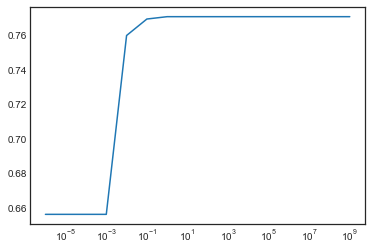

In [19]:
best_C = logr_C_search.best_params_['C']
best_alpha_C = 1./ best_C / num_patterns
print("best C: %.4f\tbest alpha: %.6f" % (best_C, best_alpha_C), 
      "acc: %.3f" % logr_C_search.best_score_) 

df_logr_C_search = pd.DataFrame.from_dict(logr_C_search.cv_results_)

plt.xscale('log')
_ = plt.plot( df_logr_C_search['param_C'], logr_C_search.cv_results_['mean_test_score'])

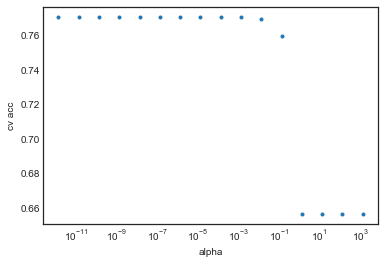

In [20]:
########## plot cv values with respect to alpha in logscale

df_logr_C_search = pd.DataFrame.from_dict(logr_C_search.cv_results_)

plt.xlabel('alpha')
plt.ylabel('cv acc')
plt.xscale('log')
_ = plt.plot( 1./df_logr_C_search['param_C']/num_patterns, df_logr_C_search['mean_test_score'], '.')

### Analyzing the performance of the best hyperparameter

In [21]:
########## CV accuracy, recall and precision of best model

logr_m =  LogisticRegression(C=best_C, solver='lbfgs', max_iter=1000)
n_folds = 10

# accuracies
acc_cv_scores = cross_val_score(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True), 
                                scoring='accuracy')
print ("acc_cv_scores:\n\t", acc_cv_scores)
print("\n\tcv acc mean: %.3f\tstd: %.3f\n" % (acc_cv_scores.mean(), acc_cv_scores.std()))

# recall
recall_cv_scores = cross_val_score(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True), 
                                   scoring='recall')
print ("recall_cv_scores:\n\t", recall_cv_scores)
print("\n\tcv recall mean: %.3f\tstd: %.3f\n" % (recall_cv_scores.mean(), recall_cv_scores.std()))

# precision
prec_cv_scores = cross_val_score(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True), 
                                 scoring='precision')
print ("precision_cv_scores:\n\t", prec_cv_scores)
print("\n\tcv precisison mean: %.3f\tstd: %.3f\n" % (prec_cv_scores.mean(), prec_cv_scores.std()))

acc_cv_scores:
	 [0.773 0.811 0.726 0.795 0.712 0.781 0.781 0.808 0.74  0.699]

	cv acc mean: 0.763	std: 0.038

recall_cv_scores:
	 [0.577 0.577 0.48  0.44  0.56  0.48  0.56  0.68  0.6   0.52 ]

	cv recall mean: 0.547	std: 0.066

precision_cv_scores:
	 [0.833 0.789 0.619 0.737 0.737 0.867 0.6   0.647 0.867 0.682]

	cv precisison mean: 0.738	std: 0.095



## Predicting probabilities

In classification we should give class probability estimates rather than labels.

To do so, we can build the histogram of the posterior probabilities predicted for the positive class and decide on adequate thresholds.

In [22]:
######### plot prob histograms
from sklearn.model_selection import cross_val_predict

logr_m =  LogisticRegression(C=best_C)


y_pred = cross_val_predict(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True))

p_pred = cross_val_predict(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True),
                           method='predict_proba')

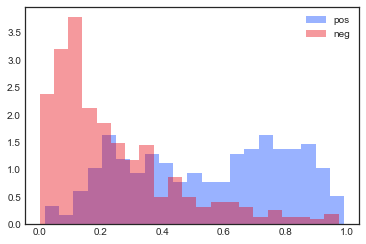

In [23]:
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

bins = 21

#plt.hist( p_pred[pos, 1], bins=bins, color='b', label='pos', alpha=0.5)
#plt.hist( p_pred[neg, 1], bins=bins, color='r', label='neg', alpha=0.5)

sns.distplot( p_pred[pos, 1], bins=bins, norm_hist=True, kde=False, color='b', label='pos')
sns.distplot( p_pred[neg, 1], bins=bins, norm_hist=True, kde=False, color='r', label='neg')
    
plt.legend(loc='best')
plt.show()

### Applying classification models

Diabetes is a serious illness so we should try to improve recall as much as possible taking also into account our resources.

We explore the effect on the classification performance of lowering the decision threshold for positives below 0.5.

In [24]:
######### threshold analysis

l_thresholds = [0.5, 0.4, 0.3, 0.2]

for thresh in l_thresholds:
    y_pred_thresh = np.zeros( num_patterns ) 
    pos_thresh = np.where(p_pred[ :, 1] > thresh)[0]
    y_pred_thresh[pos_thresh] = 1

    print("threshold:", thresh)
    print("\tconfusion matrix\n", confusion_matrix(y, y_pred_thresh) )
    print("\n\taccuracy\t%.3f"    %   accuracy_score(y, y_pred_thresh) )
    print("\trecall\t\t%.3f"      %   recall_score(y, y_pred_thresh) )
    print("\tprecision\t%.3f"     %   precision_score(y, y_pred_thresh) )
    print("\tnum_alertas\t%d\n\n" %   confusion_matrix(y, y_pred_thresh)[ : , 1 ].sum() )    

threshold: 0.5
	confusion matrix
 [[426  55]
 [111 141]]

	accuracy	0.774
	recall		0.560
	precision	0.719
	num_alertas	196


threshold: 0.4
	confusion matrix
 [[391  90]
 [ 85 167]]

	accuracy	0.761
	recall		0.663
	precision	0.650
	num_alertas	257


threshold: 0.3
	confusion matrix
 [[342 139]
 [ 61 191]]

	accuracy	0.727
	recall		0.758
	precision	0.579
	num_alertas	330


threshold: 0.2
	confusion matrix
 [[266 215]
 [ 25 227]]

	accuracy	0.673
	recall		0.901
	precision	0.514
	num_alertas	442




### To go further ...

The Pima Indian Diabetes dataset is further explored by Lahiru Liyanapathirana in the Towards Data Science section of Medium

* https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-0

* https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-02-11262b7f7a5c

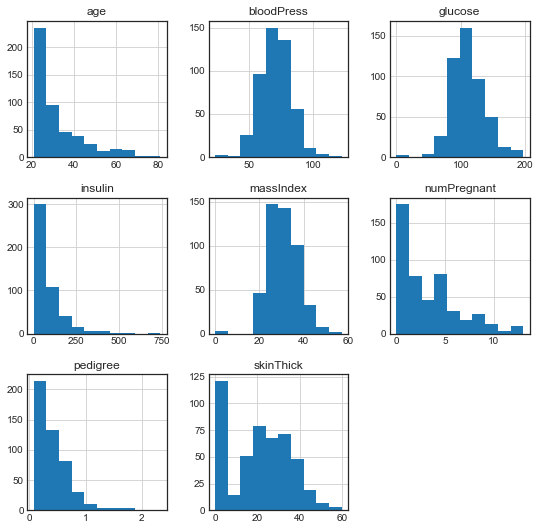

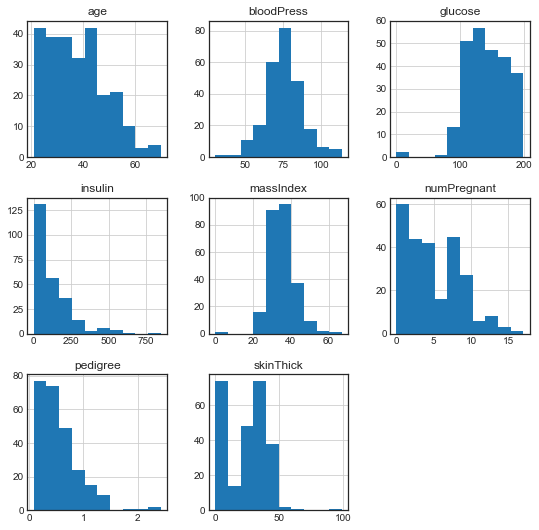

In [25]:
_ = df_pima.groupby('label').hist(figsize=(9, 9))

## MLP Classifier

In [26]:
from sklearn.neural_network import MLPClassifier

x = df_pima[ vars_pima ].values
y = df_pima[ target_pima ].values

# scale data
std_sc = StandardScaler()
x = std_sc.fit_transform(x)

### CV Hyperparametrization

In [27]:
l_alpha = [10.**k for k in range(-6, 5)]
param_grid = {'alpha': l_alpha}

n_folds = 10
hidden_layer_sizes = (20, 20)

mlp_c = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      solver='adam', activation='relu',
                      tol=1.e-4, max_iter=1000,
                      warm_start=True,
                      shuffle=True)

mlp_c_alpha_search = GridSearchCV(mlp_c, param_grid=param_grid, cv=StratifiedKFold(n_folds, shuffle=True), 
                                  scoring='accuracy', 
                                  n_jobs=2, return_train_score=True, verbose=1)

mlp_c_alpha_search.fit(x, y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 110 out of 110 | elapsed:  3.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=True),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [28]:
mlp_c = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      solver='adam', activation='relu',
                      alpha=mlp_c_alpha_search.best_params_['alpha'],
                      tol=1.e-4, max_iter=1000,
                      shuffle=True, verbose=1)

mlp_c.fit(x, y)

Iteration 1, loss = 1.58812097
Iteration 2, loss = 1.55232641
Iteration 3, loss = 1.51995860
Iteration 4, loss = 1.48901081
Iteration 5, loss = 1.46087128
Iteration 6, loss = 1.43373483
Iteration 7, loss = 1.40856789
Iteration 8, loss = 1.38421350
Iteration 9, loss = 1.36140349
Iteration 10, loss = 1.33908495
Iteration 11, loss = 1.31751636
Iteration 12, loss = 1.29677369
Iteration 13, loss = 1.27668331
Iteration 14, loss = 1.25705307
Iteration 15, loss = 1.23807193
Iteration 16, loss = 1.21957713
Iteration 17, loss = 1.20183186
Iteration 18, loss = 1.18435442
Iteration 19, loss = 1.16739820
Iteration 20, loss = 1.15101444
Iteration 21, loss = 1.13506059
Iteration 22, loss = 1.11952672
Iteration 23, loss = 1.10435330
Iteration 24, loss = 1.08960976
Iteration 25, loss = 1.07515411
Iteration 26, loss = 1.06122413
Iteration 27, loss = 1.04759072
Iteration 28, loss = 1.03435722
Iteration 29, loss = 1.02144681
Iteration 30, loss = 1.00892103
Iteration 31, loss = 0.99662599
Iteration 32, los

MLPClassifier(activation='relu', alpha=10.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=1, warm_start=False)

### Analyzing the CV results

We plot the CV errors to check on the adequacy of the best hyperparameter.

best alpha: 10.000000 acc: 0.771


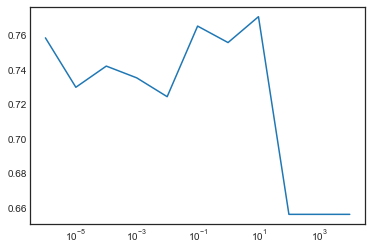

In [29]:
best_alpha = mlp_c_alpha_search.best_params_['alpha']
print("best alpha: %.6f" % best_alpha, 
      "acc: %.3f" % mlp_c_alpha_search.best_score_) 

df_mlp_c_alpha_search = pd.DataFrame.from_dict(mlp_c_alpha_search.cv_results_)

plt.xscale('log')
_ = plt.plot( df_mlp_c_alpha_search['param_alpha'], mlp_c_alpha_search.cv_results_['mean_test_score'])

In [30]:
#Second try
l_alpha = [1. * 2.**k for k in range(-5, 6)]
param_grid = {'alpha': l_alpha}

n_folds = 10
hidden_layer_sizes = (20, 20)

mlp_c = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      solver='adam', activation='relu',
                      tol=1.e-4, warm_start=False,
                      shuffle=True)

mlp_c_alpha_search_01 = GridSearchCV(mlp_c, param_grid=param_grid, cv=StratifiedKFold(n_folds, shuffle=True), 
                                    scoring='accuracy', 
                                    n_jobs=2, return_train_score=True,
                                    verbose=1)

mlp_c_alpha_search_01.fit(x, y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   50.1s
[Parallel(n_jobs=2)]: Done 110 out of 110 | elapsed:  1.7min finished
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

best alpha: 4.000000 acc: 0.771


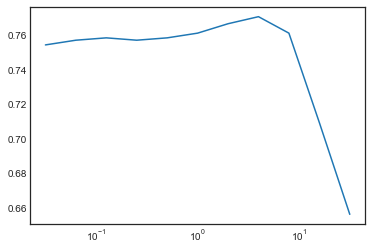

In [31]:
best_alpha = mlp_c_alpha_search_01.best_params_['alpha']
print("best alpha: %.6f" % best_alpha, 
      "acc: %.3f" % mlp_c_alpha_search_01.best_score_) 

df_mlp_c_alpha_search_01 = pd.DataFrame.from_dict(mlp_c_alpha_search_01.cv_results_)

plt.xscale('log')
_ = plt.plot( df_mlp_c_alpha_search_01['param_alpha'], mlp_c_alpha_search_01.cv_results_['mean_test_score'])

In [32]:
########## CV accuracy, recall and precision of best model

mlp_c = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      alpha=best_alpha,
                      solver='adam', activation='relu',
                      tol=1.e-4, max_iter=1000,
                      warm_start=False,
                      shuffle=True)
n_folds = 10

# accuracies
acc_cv_scores = cross_val_score(mlp_c, x, y, cv=StratifiedKFold(n_folds, shuffle=True), 
                                scoring='accuracy')
print ("acc_cv_scores:\n\t", acc_cv_scores)
print("\n\tcv acc mean: %.3f\tstd: %.3f\n" % (acc_cv_scores.mean(), acc_cv_scores.std()))

# recall
recall_cv_scores = cross_val_score(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True), 
                                   scoring='recall')
print ("recall_cv_scores:\n\t", recall_cv_scores)
print("\n\tcv recall mean: %.3f\tstd: %.3f\n" % (recall_cv_scores.mean(), recall_cv_scores.std()))

# precision
prec_cv_scores = cross_val_score(logr_m, x, y, cv=StratifiedKFold(n_folds, shuffle=True), 
                                 scoring='precision')
print ("precision_cv_scores:\n\t", prec_cv_scores)
print("\n\tcv precisison mean: %.3f\tstd: %.3f\n" % (prec_cv_scores.mean(), prec_cv_scores.std()))

acc_cv_scores:
	 [0.773 0.703 0.822 0.74  0.767 0.822 0.753 0.808 0.699 0.836]

	cv acc mean: 0.772	std: 0.047

recall_cv_scores:
	 [0.538 0.538 0.6   0.4   0.6   0.68  0.44  0.64  0.44  0.64 ]

	cv recall mean: 0.552	std: 0.092

precision_cv_scores:
	 [0.812 0.625 0.8   0.63  0.643 0.654 0.696 0.875 0.75  0.714]

	cv precisison mean: 0.720	std: 0.082



## Predicting probabilities

In classification we should give class probability estimates rather than labels.

To do so, we can build the histogram of the posterior probabilities predicted for the positive class and decide on adequate thresholds.

In [33]:
######### plot prob histograms
from sklearn.model_selection import cross_val_predict

mlp_c = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      alpha=best_alpha,
                      solver='adam', activation='relu',
                      tol=1.e-4, max_iter=1000,
                      warm_start=False,
                      shuffle=True)

y_pred = cross_val_predict(mlp_c, x, y, cv=StratifiedKFold(n_folds, shuffle=True))

p_pred = cross_val_predict(mlp_c, x, y, cv=StratifiedKFold(n_folds, shuffle=True),
                           method='predict_proba')

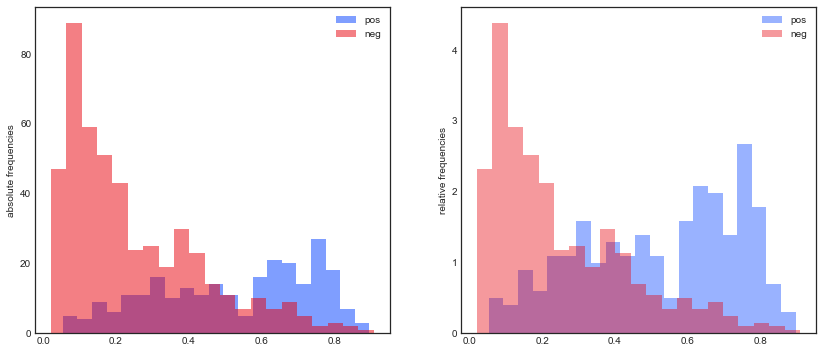

In [34]:
pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

bins = 21

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.ylabel("absolute frequencies")
plt.hist( p_pred[pos, 1], bins=bins, normed=False, color='b', label='pos', alpha=0.5)
plt.hist( p_pred[neg, 1], bins=bins, normed=False, color='r', label='neg', alpha=0.5)
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.ylabel("relative frequencies")
sns.distplot( p_pred[pos, 1], bins=bins, norm_hist=True, kde=False, color='b', label='pos')
sns.distplot( p_pred[neg, 1], bins=bins, norm_hist=True, kde=False, color='r', label='neg')
plt.legend(loc='best')

plt.show()

### Applying classification models

Diabetes is a serious illness so we should try to improve recall as much as possible taking also into account our resources.

We explore the effect on the classification performance of lowering the decision threshold for positives below 0.5.

In [35]:
######### threshold analysis

l_thresholds = [0.5, 0.4, 0.3, 0.2]

for thresh in l_thresholds:
    y_pred_thresh = np.zeros( num_patterns ) 
    pos_thresh = np.where(p_pred[ :, 1] > thresh)[0]
    y_pred_thresh[pos_thresh] = 1

    print("threshold:", thresh)
    print("\tconfusion matrix\n", confusion_matrix(y, y_pred_thresh) )
    print("\n\taccuracy\t%.3f"    %   accuracy_score(y, y_pred_thresh) )
    print("\trecall\t\t%.3f"      %   recall_score(y, y_pred_thresh) )
    print("\tprecision\t%.3f"     %   precision_score(y, y_pred_thresh) )
    print("\tnum_alertas\t%d\n\n" %   confusion_matrix(y, y_pred_thresh)[ : , 1 ].sum() )

threshold: 0.5
	confusion matrix
 [[430  51]
 [112 140]]

	accuracy	0.778
	recall		0.556
	precision	0.733
	num_alertas	191


threshold: 0.4
	confusion matrix
 [[386  95]
 [ 83 169]]

	accuracy	0.757
	recall		0.671
	precision	0.640
	num_alertas	264


threshold: 0.3
	confusion matrix
 [[332 149]
 [ 47 205]]

	accuracy	0.733
	recall		0.813
	precision	0.579
	num_alertas	354


threshold: 0.2
	confusion matrix
 [[255 226]
 [ 21 231]]

	accuracy	0.663
	recall		0.917
	precision	0.505
	num_alertas	457


